Importation des librairies

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


Lecture des données

In [14]:
df = pd.read_csv(r'C:\Users\Dell\Documents\PortofolioProject\movies.csv')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

Nous allons voir s'il nous manque des données
Parcourons les données et voyons s'il manque quelque chose

In [23]:
#Ce code vous aide à analyser rapidement le pourcentage de données manquantes (NaN)
#dans chaque colonne d'un DataFrame, ce qui est utile pour le nettoyage de données
#avant des étapes de traitement ou d'analyse.

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [27]:
#Vérifions le type de données des colonnes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [35]:
# Changer le type de données d'une colonne
# Vérification des valeurs nulles ou non valides avant la conversion
# pd.to_numeric(df['budget'], errors='coerce'), Cette fonction convertit la colonne en valeurs numériques.
   #Si des valeurs non convertibles sont trouvées (par exemple, des chaînes de caractères),
   #elles sont remplacées par NaN (grâce à errors='coerce'). 
#.fillna(0) :
   #Cette méthode remplace les valeurs NaN (qui résultent d'erreurs de conversion) par 0, pour éviter des erreurs lors de la conversion en int64.
#.astype('int64') : Convertit enfin la colonne en entier 64 bits (int64).
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')


In [37]:
# Voir la dimension d'un dataframe
df.shape  #ici c'est 7668 lignes et 15 colonnes

(7668, 15)

In [41]:
# Conversion de 'released' en chaîne de caractères et gestion des valeurs manquantes
df['yearcorrect'] = df['released'].astype(str).str[:4]

# Optionnel : Gérer les valeurs non valides (par exemple, si la chaîne a moins de 4 caractères)
df['yearcorrect'] = pd.to_numeric(df['yearcorrect'], errors='coerce')

df


name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  yearcorrect  
0      46998772               Warner Bros.    146.0          NaN  
1      58853106          Columbia Pictures    104.0          NaN  
2     538375067                  Lucasfilm    124.0          NaN  
3      83453539         Paramount Pictures     88.0          NaN  
4      39846344             Orion Pictures     98.0          NaN  
...         ...                        ...      ...          ...  
7663          0                        NaN     90.0          NaN  
7664          0  Cactus Blue Entertainment     90.0          NaN  
7665          0           Embi Productions      NaN          NaN  
7666          0                        NaN    120.0          NaN  
7667          0                PK 65 Films    102.0          NaN  

[7668 rows x 16 columns]

In [56]:
# Tri
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [53]:
#pd.set_option('display.max_rows', None)

<Axes: xlabel='gross', ylabel='budget'>

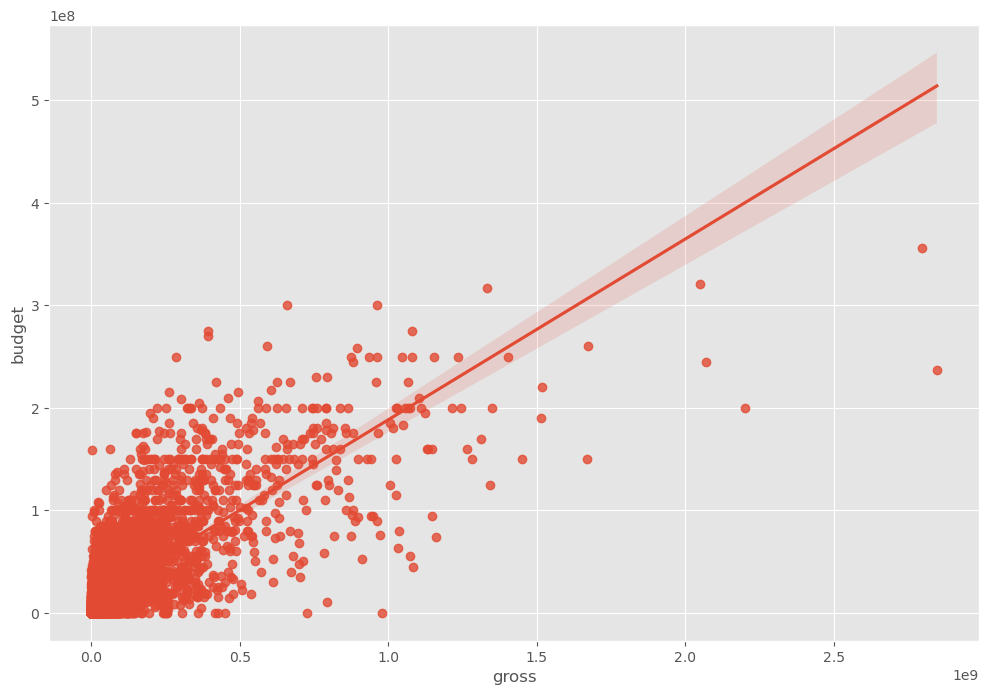

In [58]:
# créer un graphique de régression linéaire avec les données du DataFrame df.
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

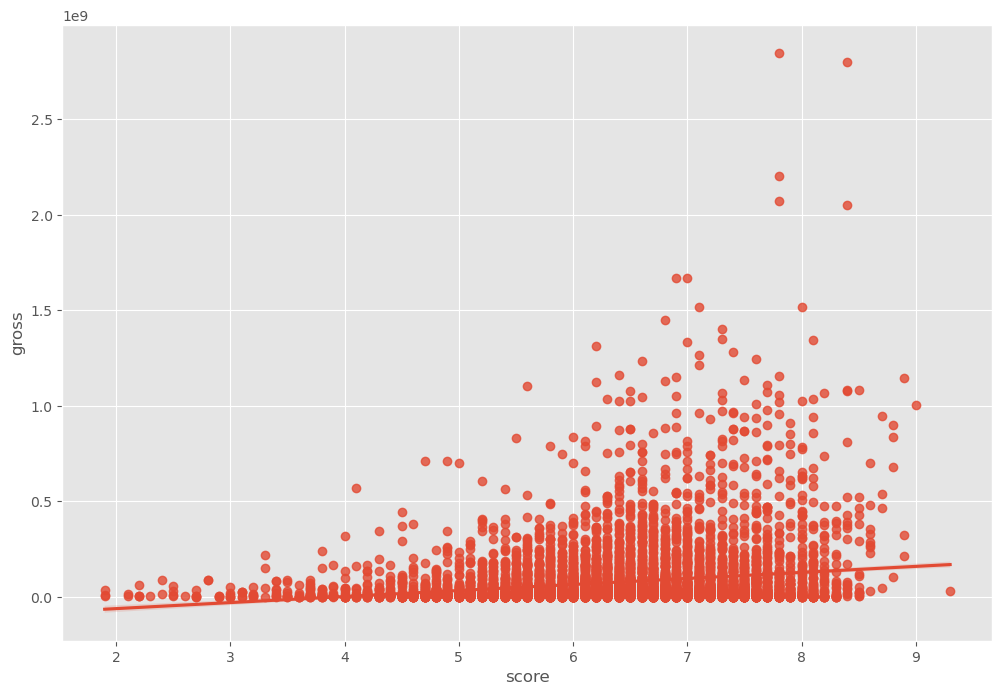

In [60]:
# créer un graphique de régression entre les colonnes score et gross 
sns.regplot(x="score", y="gross", data=df)

In [68]:
# Matrice de corrélation entre toutes les colonnes numériques
# matrice de corrélation pour un DataFrame df en utilisant la méthode de Pearson 
# Filtrer uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation avec les colonnes numériques
correlation_matrix = numeric_df.corr(method='pearson')

correlation_matrix


year     score     votes    budget     gross   runtime  \
year         1.000000  0.097995  0.222945  0.309212  0.261900  0.120811   
score        0.097995  1.000000  0.409182  0.055665  0.186392  0.399451   
votes        0.222945  0.409182  1.000000  0.486862  0.632834  0.309212   
budget       0.309212  0.055665  0.486862  1.000000  0.750157  0.269510   
gross        0.261900  0.186392  0.632834  0.750157  1.000000  0.245235   
runtime      0.120811  0.399451  0.309212  0.269510  0.245235  1.000000   
yearcorrect  0.924799 -0.136418  0.926848 -0.400239  0.562986  0.055838   

             yearcorrect  
year            0.924799  
score          -0.136418  
votes           0.926848  
budget         -0.400239  
gross           0.562986  
runtime         0.055838  
yearcorrect     1.000000

In [74]:
# matrice de corrélation pour un DataFrame df en utilisant la méthode de kendall 
# Filtrer uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation avec les colonnes numériques
correlation_matrix = numeric_df.corr(method='kendall')

correlation_matrix

year     score     votes    budget     gross   runtime  \
year         1.000000  0.067652  0.331465  0.209304  0.216595  0.097184   
score        0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611   
votes        0.331465  0.300115  1.000000  0.439902  0.560118  0.198240   
budget       0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016   
gross        0.216595  0.090626  0.560118  0.541956  1.000000  0.176912   
runtime      0.097184  0.283611  0.198240  0.176016  0.176912  1.000000   
yearcorrect  0.953488  0.166714  0.522862 -0.103108  0.321860 -0.141186   

             yearcorrect  
year            0.953488  
score           0.166714  
votes           0.522862  
budget         -0.103108  
gross           0.321860  
runtime        -0.141186  
yearcorrect     1.000000

In [78]:
# matrice de corrélation pour un DataFrame df en utilisant la méthode de Spearman
# Filtrer uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation avec les colonnes numériques
correlation_matrix = numeric_df.corr(method='spearman')

correlation_matrix

year     score     votes    budget     gross   runtime  \
year         1.000000  0.099045  0.469829  0.291152  0.314681  0.142977   
score        0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857   
votes        0.469829  0.428138  1.000000  0.604627  0.752265  0.290159   
budget       0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748   
gross        0.314681  0.132569  0.752265  0.716816  1.000000  0.256783   
runtime      0.142977  0.399857  0.290159  0.246748  0.256783  1.000000   
yearcorrect  0.987730  0.216728  0.670744 -0.156111  0.437311 -0.160497   

             yearcorrect  
year            0.987730  
score           0.216728  
votes           0.670744  
budget         -0.156111  
gross           0.437311  
runtime        -0.160497  
yearcorrect     1.000000

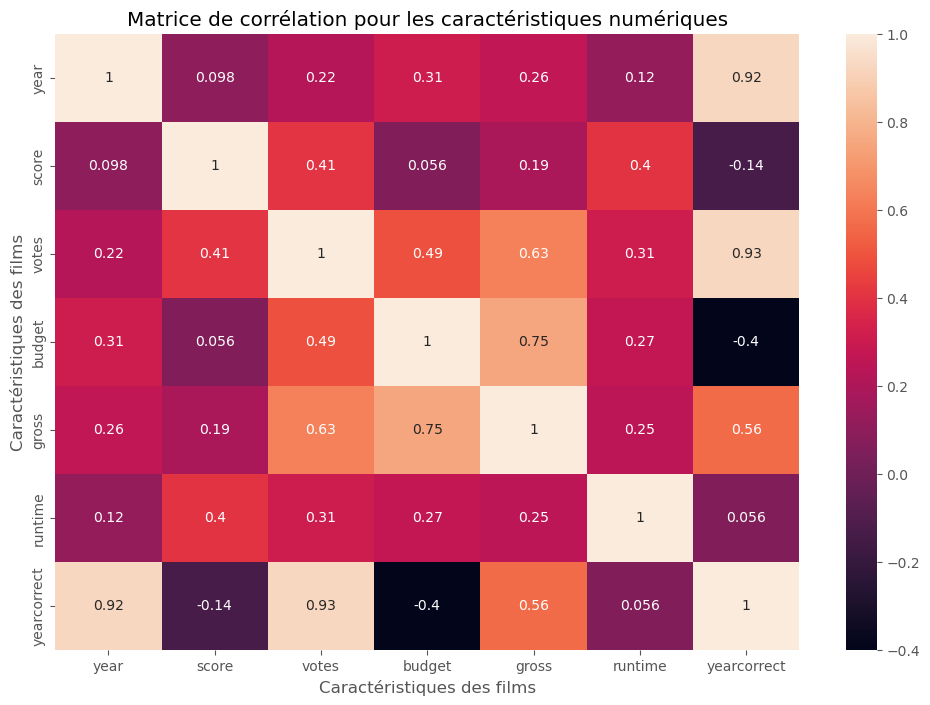

In [86]:
# Filtrer uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation avec les colonnes numériques
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Matrice de corrélation pour les caractéristiques numériques")

plt.xlabel("Caractéristiques des films")

plt.ylabel("Caractéristiques des films")

plt.show()

In [88]:
# Utilisation de factorise - cela attribue une valeur numérique aléatoire pour chaque valeur catégorielle unique
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000  0.143938  0.036367  0.965761  0.959015 -0.046733   
rating       0.143938  1.000000 -0.086723  0.156713  0.146606  0.012595   
genre        0.036367 -0.086723  1.000000  0.037184  0.035940 -0.002437   
year         0.965761  0.156713  0.037184  1.000000  0.993190 -0.044981   
released     0.959015  0.146606  0.035940  0.993190  1.000000 -0.045761   
score       -0.046733  0.012595 -0.002437 -0.044981 -0.045761  1.000000   
votes        0.287776  0.099972  0.023285  0.312401  0.299905 -0.009749   
director     0.745905  0.085520  0.047288  0.770497  0.770876 -0.022687   
writer       0.805211  0.103623  0.033688  0.824770  0.819617 -0.034685   
star         0.731565  0.093116  0.038649  0.756400  0.754468 -0.009896   
country      0.142828  0.000494 -0.015795  0.140216  0.148468  0.023097   
budget       0.275691  0.193229  0.069445  0.298022  0.284017 -0.011749   
gross        0.947540  0.158575  0.038635  0.981090  0.976647 -0.047004   
company      0.591667 -0.028035  0.009566  0.601571  0.607954 -0.028432   
runtime      0.048955  0.032741  0.001462  0.050647  0.048235  0.026436   
yearcorrect -0.013178  0.016435 -0.006840 -0.015064 -0.012889 -0.020889   

                votes  director    writer      star   country    budget  \
name         0.287776  0.745905  0.805211  0.731565  0.142828  0.275691   
rating       0.099972  0.085520  0.103623  0.093116  0.000494  0.193229   
genre        0.023285  0.047288  0.033688  0.038649 -0.015795  0.069445   
year         0.312401  0.770497  0.824770  0.756400  0.140216  0.298022   
released     0.299905  0.770876  0.819617  0.754468  0.148468  0.284017   
score       -0.009749 -0.022687 -0.034685 -0.009896  0.023097 -0.011749   
votes        1.000000  0.192220  0.224122  0.179601 -0.045914  0.395374   
director     0.192220  1.000000  0.748340  0.682385  0.155471  0.108033   
writer       0.224122  0.748340  1.000000  0.675685  0.157202  0.186680   
star         0.179601  0.682385  0.675685  1.000000  0.182045  0.110870   
country     -0.045914  0.155471  0.157202  0.182045  1.000000 -0.068884   
budget       0.395374  0.108033  0.186680  0.110870 -0.068884  1.000000   
gross        0.286308  0.751149  0.805784  0.735911  0.134123  0.282633   
company      0.008900  0.552258  0.546151  0.527116  0.226346 -0.087285   
runtime      0.106024 -0.011070  0.032264  0.035392  0.124154  0.115359   
yearcorrect -0.003747 -0.009930 -0.009467  0.004232  0.012042 -0.007142   

                gross   company   runtime  yearcorrect  
name         0.947540  0.591667  0.048955    -0.013178  
rating       0.158575 -0.028035  0.032741     0.016435  
genre        0.038635  0.009566  0.001462    -0.006840  
year         0.981090  0.601571  0.050647    -0.015064  
released     0.976647  0.607954  0.048235    -0.012889  
score       -0.047004 -0.028432  0.026436    -0.020889  
votes        0.286308  0.008900  0.106024    -0.003747  
director     0.751149  0.552258 -0.011070    -0.009930  
writer       0.805784  0.546151  0.032264    -0.009467  
star         0.735911  0.527116  0.035392     0.004232  
country      0.134123  0.226346  0.124154     0.012042  
budget       0.282633 -0.087285  0.115359    -0.007142  
gross        1.000000  0.588371  0.043017    -0.016243  
company      0.588371  1.000000  0.005137     0.007210  
runtime      0.043017  0.005137  1.000000     0.000559  
yearcorrect -0.016243  0.007210  0.000559     1.000000

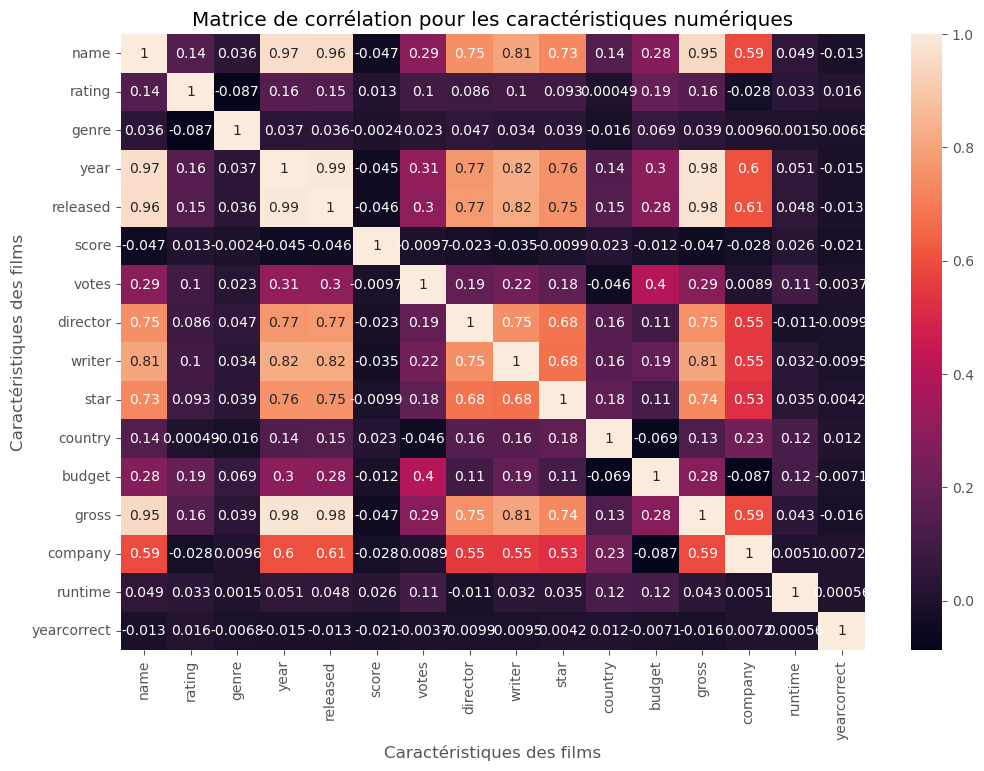

In [94]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Matrice de corrélation pour les caractéristiques numériques")

plt.xlabel("Caractéristiques des films")

plt.ylabel("Caractéristiques des films")

plt.show()